<a href="https://colab.research.google.com/github/raviteja-padala/Time_Series/blob/main/Time_series_forecast_Air_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Time Series Analysis on AirPassengers Dataset


**Objective:**
To conduct a comprehensive time series analysis on the AirPassengers dataset, which comprises monthly records of the number of international airline passengers arriving in the United States from January 1949 to December 1960.


**Dataset Description:**
The AirPassengers dataset is a valuable historical record of international airline passenger arrivals, spanning over a decade. It provides an excellent opportunity to apply time series analysis techniques to understand and forecast future passenger traffic.

**Key Steps and Methods Explored:**

1. **Data Preprocessing:**
   - Checked for missing values and data integrity.
   - Transformed the dataset into a time series format, ensuring a datetime index.

2. **Forecasting Methods:**
   - **Naive Method:** A simple baseline method for forecasting.
   - **Simple Average Method:** Using the average of past observations for forecasting.
   - **Simple Moving Average Method:** Employing a rolling window to calculate moving averages.
   - **Simple Exponential Smoothing Method:** Applying exponential smoothing to capture trends and seasonality.
   - **Holt's Exponential Smoothing Method:** Incorporating exponential smoothing with trend components.
   - **Holt's Winter Additive Method:** A seasonal method with additive components.
   - **Holt's Winter Multiplicative Method:** A seasonal method with multiplicative components.
   - **ARIMA:** AutoRegressive Integrated Moving Average model.
   - **SARIMA:** Seasonal AutoRegressive Integrated Moving Average model.
   - **SARIMAX:** Seasonal AutoRegressive Integrated Moving Average model with exogenous variables.

3. **Evaluation Metrics:**
   - Calculated RMSE and MAPE to assess the accuracy of each forecasting method.
   
4. **Decomposition Analysis:**
   - Conducted a decomposition analysis to understand the underlying trends, seasonality, and noise in the dataset.


In [ ]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=Warning)

In [ ]:
#Loading AirPassenger data set
df = pd.read_csv("https://raw.githubusercontent.com/raviteja-padala/Datasets/main/AirPassengers.csv")

#to view top 5 columns
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
#viewing dataset
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
#shape of dataset
df.shape

(144, 2)

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


*Observation*:

There are 144 records in 2 columns. There are no null records present. But, data in Month column is OBJECT TYPE. We need to convert them in to DATETIME DATATYPE.

In [ ]:
#renaming #passengers column
df.rename(columns={'#Passengers':'Passengers'},inplace=True)

In [ ]:
#convert month column to DATETIME DATATYPE.
from datetime import datetime
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)

In [ ]:
#checking datatypes
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [ ]:
# we need to set Month  as index column.

df1 = df.set_index('Month',inplace=False)
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Outlier detection
Box plot and interquartile range

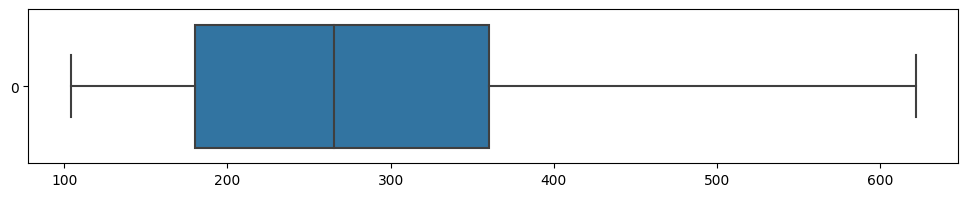

In [ ]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df1['Passengers'], orient='h', whis=1.5)

* whis=1.5: The 'whis' parameter stands for "whisker" length. It is an optional parameter that controls the length of the whiskers in the box plot. In this case, whis=1.5 means that the whiskers will extend to 1.5 times the interquartile range (IQR) from the first and third quartiles. This can be used to visualize potential outliers beyond that range.

whis=1.5

1st quartile = 180

3rd quartile = 360

IQR =Q3-Q1

Inter Quartile range = (3rd quartile - 1st quartile) = 360-180 = 180


*Whisker on the upper side*

UCL = Q3+ 1.5 X IQR

3rd quartile + (Quartile range * whis) = 360 + (180 * 1.5) = 360 + 270 = 630

There is no outliers above the whisker 630.

*Whisker on th lower side*

LCL = Q1 - 1.5 X IQR

1st quartile - (Quartile range * whis) = 180 - (180 * 1.5) = -90

There is no outliers on the negative side of the lower whisker.

# Time series decomposition

* Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise(irregularity) components.

* A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

>-Level: The average value in the series.<br>
-Trend: The increasing or decreasing value in the series.<br>
-Seasonality: The repeating short-term cycle in the series.<br>
-Noise: The random variation in the series.

The following two structures are considered for basic decomposition models:

> -Additive:  = Trend + Seasonal + Random <br>
-Multiplicative:   = Trend * Seasonal * Random

How to Choose Between Additive and Multiplicative Decompositions
> -The additive model is useful when the seasonal variation is relatively constant over time.<br>
>-The multiplicative model is useful when the seasonal variation increases over time.

## Additive seasonal decomposition

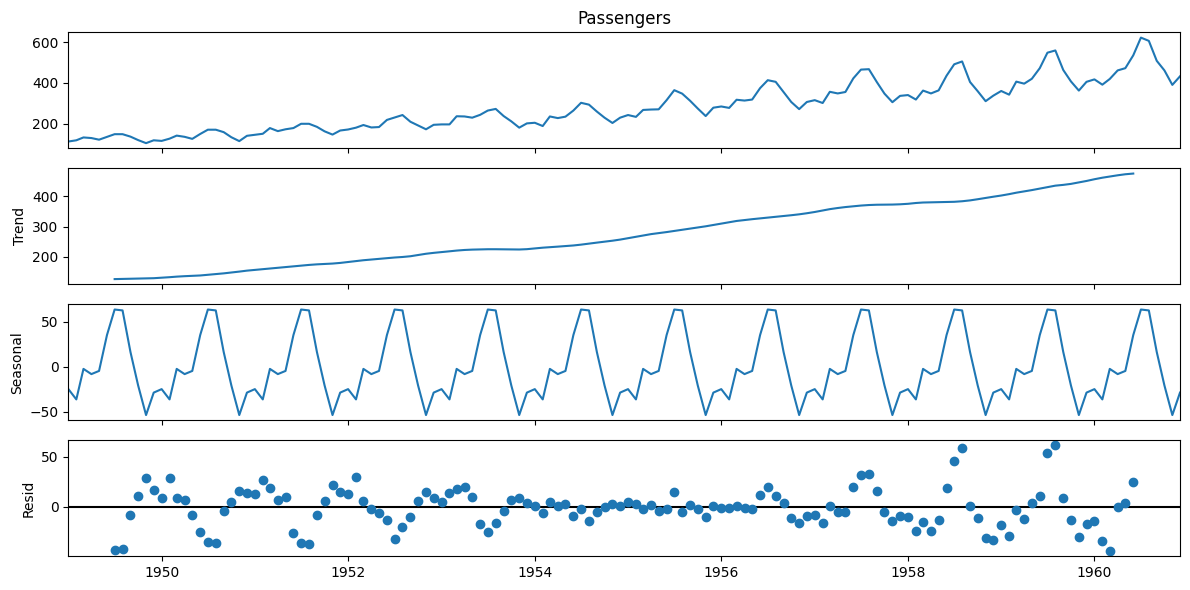

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,6
decomposition = sm.tsa.seasonal_decompose(df1['Passengers'], model='additive')
fig = decomposition.plot()
plt.show()

*Observation*:

Analysis:-
*Passengers* - Actual data.<br>

*Trend* - Increasing or decreasing trend.<br>

*Seasonal* -
Varies from +50 to -50 with the mean 0.
Each cycle represents each year trend.
 <br>

*Residual* - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)

## Multiplicative seasonal decomposition

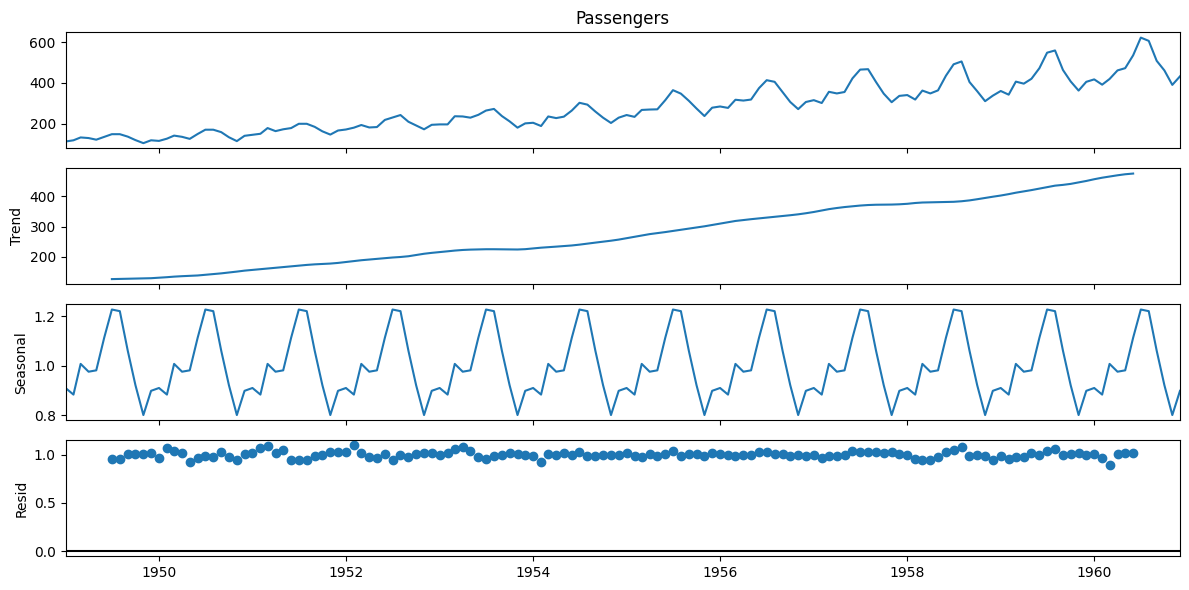

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df1['Passengers'], model='multiplicative')

rcParams['figure.figsize'] = 12,6
fig = decomposition.plot()
plt.show()

*Observation:*

The trend component shows the overall increase in the number of passengers over time. The seasonality component shows the periodic variation in the number of passengers, which is a yearly pattern. The residuals component shows the random variation in the number of passengers, which is not explained by the trend or seasonality components.

In this case, the seasonal component is clearly visible, which suggests that a seasonal model, such as SARIMA, would be a good choice for forecasting the number of passengers.


# Build and Evaluate time series forecast

Splitting the data into train and test set
We are going to forecat for the last two years. 1959 and 1960.

Last 24 records contain 1959 and 1960 data.

In [ ]:
train_len = 120
train = df1[0:train_len]

# 1959 and 1960 data
test = df1[train_len:]

In [ ]:
print("Shape of train dataset:", train.shape)
train.head()

Shape of train dataset: (120, 1)


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
print("Shape of test dataset:",test.shape)
test.head()

Shape of test dataset: (24, 1)


,Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420


## Naive Forecast method
 If we want to forecast the price for the next day, we can simply take the last day value and estimate the same value for the next day. Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.



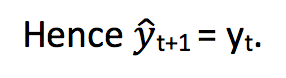

In [ ]:
# Creating a new dataframe by copying the test data
# Because we will forecast the last two years data and comapre the forecast in this new coppied dataframe.
y_hat_naive = test.copy()
y_hat_naive.head()

,Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420


In [ ]:
# Assigning the last value of the train set (December 1958 value) to all the test data records
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [ ]:
y_hat_naive.head()

,Passengers,naive_forecast
Month,,
1959-01-01,360,337
1959-02-01,342,337
1959-03-01,406,337
1959-04-01,396,337
1959-05-01,420,337


### Plot train, test and naive forecast data

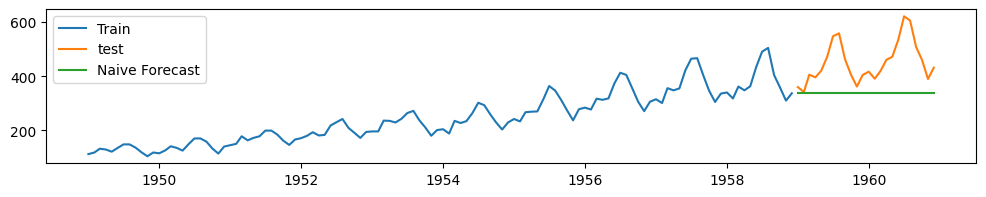

In [ ]:
plt.figure(figsize=(12,2))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

*Observation*:

1.All the values are same as we assigned all the forecasting records to the last value of the train set(Dec 1958). <br>
2.The forecasting is undervalued when compared to the actual test data value.

## Calculate RMSE and MAPE Error for NAive forcast

## RMSE

 RMSE calculation is done by taking sum of the Square of Differences and dividing it by the count (sample size), and then taking the square root of the result

In [ ]:
from sklearn.metrics import mean_squared_error

# mean_squared_error is a sqaured term of the error
# In order to make the error comparable with the target variable, we have to take the square root of the error (RMSE)

rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
rmse

137.33

## MAPE

To Calculate the MAPE
Add all the absolute percent errors together and divide the sum by the number of errors.

In [ ]:
#MAPE (Mean absolute percentage error)

mape = round(np.mean(np.abs((test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100),2)
mape

23.58

*Observation* :

MAPE is the percentage of error.

So, we can see that we have 23% error that means we are 77% accurate to forecast.

In [ ]:
#creating a dataframe

results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58


---

# Simple average method
Forecast = Average of all past months’ data

Average of all the train data values assigned to the test data.

In [ ]:
y_hat_avg = test.copy()

In [ ]:
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

In [ ]:
y_hat_avg.head()

,Passengers,avg_forecast
Month,,
1959-01-01,360,245.908333
1959-02-01,342,245.908333
1959-03-01,406,245.908333
1959-04-01,396,245.908333
1959-05-01,420,245.908333


### Plot train, test and Average forecast data

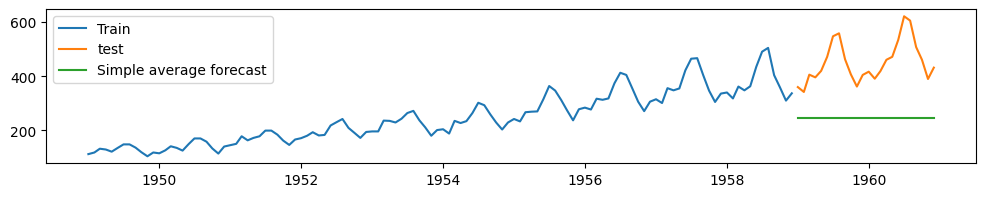

In [ ]:
plt.figure(figsize=(12,2))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

*Observation:*

We have unnder estimated the actual test value while doing the forecasting. Because we took the mean of all the lower values, while the trend of the time series is in increasing pattern.

## Calculate RMSE and MAPE Error for Simple average method

In [ ]:
#RMSE

rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
rmse

219.44

In [ ]:
#MAPE

mape = round(np.mean(np.abs((test['Passengers'] - y_hat_avg['avg_forecast'])/test['Passengers'])*100),2)
mape

44.23

In [ ]:
results = results.append({'Method':'Simple average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58
1,Simple average method,219.44,44.23


*Observation*:

We can see that both RMSE and MAPE errors have increased with the Simple average method.

Accuracy = 1 - MAPE

## Simple moving average method

- Simple moving average (SMA) is a form of moving average (MA) is calculated by taking the arithmetic mean of a given set of data over a certain period of time. It takes the sliding window over a given time period. It can be termed as an equally weighted mean of n records. The advantage of using SMA is that it is simple to calculate and understand.

In [ ]:
# We are copying entire data because we want to see the forecast for the entire dataset (train and test)
y_hat_sma = df1.copy()

In [ ]:
# Moving average window. We will take the avg of last 12 months for forecasting the future.
ma_window = 12

In [ ]:
# Rolling function calculated the last number of records
y_hat_sma['sma_forecast'] = df1['Passengers'].rolling(ma_window).mean()

- We are predicting the test set on basis of the train set. By simple avg method, we are taking the avg of the last 12 months and forecasting that avg value for the future months.

- Here, we are forecasting 1959 and 1960. For 1959 Jan we will get the average of the last 12 months from the train set. But when we will forecast for Feb 1959, then for taking the last 12 months the Jan 1959, which belongs to the test set will be calculated for the avg calculation.

- Hecne, in the below code we are fixing all the test set values with the last 12 months values from the train set.

In [ ]:
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

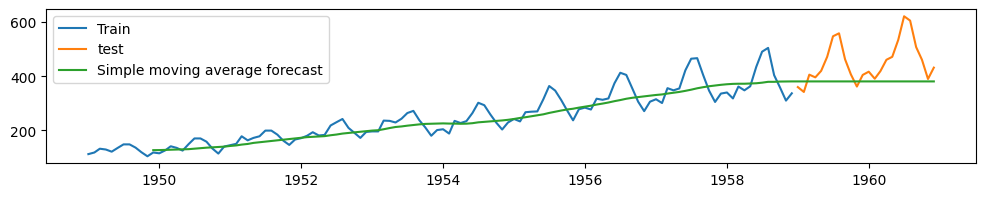

In [ ]:
plt.figure(figsize=(12,2))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
#RMSE

# We are taking only the test data points of y_hat_sma. After the train_len data points
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
rmse

103.21

In [ ]:
#MAPE

mape = round(np.mean(np.abs((test['Passengers'] - y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100),2)
mape

15.47

In [ ]:
results = results.append({'Method':'Simple moving average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58
1,Simple average method,219.44,44.23
2,Simple moving average method,103.21,15.47


## 6 Months Moving Average window

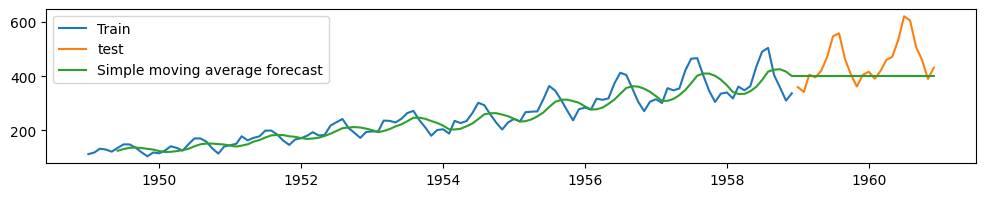

In [ ]:
ma_window = 6
y_hat_sma['sma_forecast'] = df1['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,2))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

## 3 Months Moving Average window

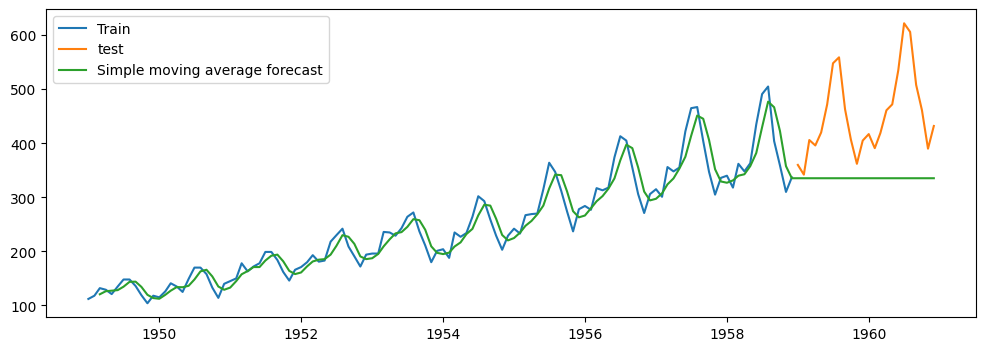

In [ ]:
ma_window = 3
y_hat_sma['sma_forecast'] = df1['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

*
We can see that with lower number of recent past data(6 months) average, the forecast line gets little seasonal passtern, just like the actual pattern.

* With more lesser number of past data (3 months), the forecasted line is almost near to the actual line.


* As we need to forecast for the longer time period for 2 or 5 years, it is better to take a moderate or reasonable amount of past data average such as *12 months*.

# Exponential Smoothing
- Simple exponential smoothing (Captures - Only Level)
- Holt's exponential smoothing (Level+Trend)
- Holt's Winter exponential smoothing (Level+Trend+Seasonality)

# Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing technique is used for data that has no trend or seasonal pattern. The SES is the simplest among all the exponential smoothing techniques. We know that in any type of exponential smoothing we weigh the recent values or observations more heavily rather than the old values or observations. The weight of each and every parameter is always determined by a smoothing parameter or alpha. The value of alpha lies between 0 and 1. In practice, if alpha is between 0.1 and 0.2 then SES will perform quite well. When alpha is closer to 0 then it is considered as slow learning since the algorithm is giving more weight to the historical data. If the value of alpha is closer to 1 then it is referred to as fast learning since the algorithm is giving the recent observations or data more weight. Hence we can say that the recent changes in the data will be leaving a greater impact on the forecasting.



In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Instantiate the model
model = SimpleExpSmoothing(train['Passengers'])
# Fit the model with alpha = 0.2
# optimized = False means, we are explicitly definign the smoothing_level.
# optimized = True means - Automitacially it will define a smoothing_level based on RMSE
model_fit = model.fit(smoothing_level = 0.2, optimized=False)
model_fit.params

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
y_hat_ses = test.copy()
# Forecast for 24 months
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

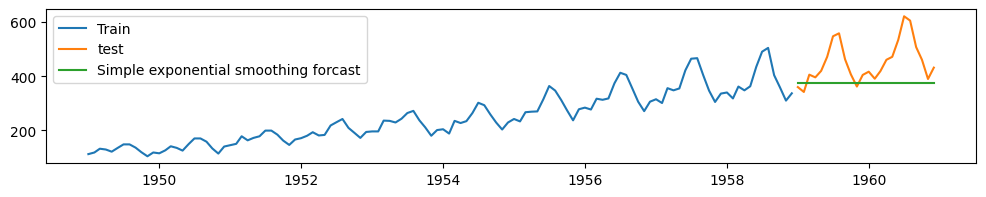

In [ ]:
plt.figure(figsize=(12,2))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
rmse

107.52

In [ ]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ses['ses_forecast'])/test['Passengers'])*100),2)
mape

16.43

In [ ]:
results = results.append({'Method':'Simple expenential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58
1,Simple average method,219.44,44.23
2,Simple moving average method,103.21,15.47
3,Simple expenential smoothing method,107.52,16.43


*Observation*:

We can see that with alpha = 0.2 the RMSE and MAPE has little increased that Simple moving avg method.


*For smoothing_level(alpha) with 0*

The forecasted line will be very low. Because the old observations will get higher weightage and the recent observations will get no weightage.

*For smoothing_level(alpha) with 1*

The forecasted line be similar as Naive method. Because the latest observations will get all the weightage and the older observations will get no weightage.

*Optimal alpha=0.2*

We gat an optimum forecasted line.

## Holt's Exponential Smoothing method
Captures both Level and Trend .

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# We have to pass an array of the dataframe into the ExponentialSmoothing instance
# We are using additive trend because, from the time serices we can see that the data is linear
# In case of geometric trend we can use multiplicative trend
# seasonal=None Because we are not capturing seasonality in this model
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal=None)

In [ ]:
# smoothing_level. It is the level parameter (alpha)
# smoothing_slope - It is the trend parameter (beta)
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 118.46666666666661,
 'initial_trend': 2.0606060606060677,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
y_hat_holt = test.copy()
# We are forecasting for next 24 months
y_hat_holt['holt_forecast'] = model_fit.forecast(24)

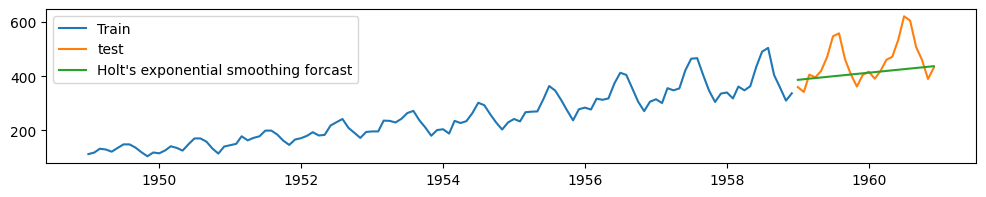

In [ ]:
plt.figure(figsize=(12,2))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

*Obseravtion*:


We can see that we are able to capture the trend of the data.
We were not able to capture the seasonality.

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
rmse

80.9

In [ ]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_holt['holt_forecast'])/test['Passengers'])*100),2)
mape

11.32

In [ ]:
results = results.append({'Method':'Holt\'s expenential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58
1,Simple average method,219.44,44.23
2,Simple moving average method,103.21,15.47
3,Simple expenential smoothing method,107.52,16.43
4,Holt's expenential smoothing method,80.90,11.32


*smoothing_slope = 0.01*

We are giving moderate weightage to the most recent values. Also, capturing the older values trend.

*smoothing_slope = 0.1*

We are giving more weightage to the most recent values. And lesser weightage to the older values trend.

Hence, the forecasted line becomes flat. Because if we notice that in 1958 Nov to Dec the trend is very low. And we are giving more weightage to this low trend than capturing the entire trend throughout the year.

## Holt-Winters's Exponential Smoothing
Captures Level, Trend and Seasonality.

## Additive method

In [ ]:
y_hat_hwa = test.copy()

In [ ]:
# We have to pass an array of the dataframe into the ExponentialSmoothing instance
# seasonal_periods = 12. Because the seasonality is on monthly basis. If the seasonality would have quarterly basis then seasonal_periods = 4 (4 quarters in an year)
# seasonal=additive for additive method
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal='additive')

In [ ]:
# optimized=True . Here we are letting the system choose the optimal alpha, beta and gamma parameter.
model_fit = model.fit(optimized=True)

In [ ]:
model_fit.params

{'smoothing_level': 0.23678678235712566,
 'smoothing_trend': 1.8055668382578714e-09,
 'smoothing_seasonal': 0.7632132086415252,
 'damping_trend': nan,
 'initial_level': 119.1876680939318,
 'initial_trend': 2.2768394955266533,
 'initial_seasons': array([ -9.42424719,  -3.87104168,   8.69002781,   3.6678027 ,
         -4.94701962,   9.26652064,  21.53444859,  19.2001798 ,
          5.07181472, -13.80997707, -28.51179942, -12.37245268]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
# Forecast for last 24 months
y_hat_hwa['hwa_forecast'] = model_fit.forecast(24)

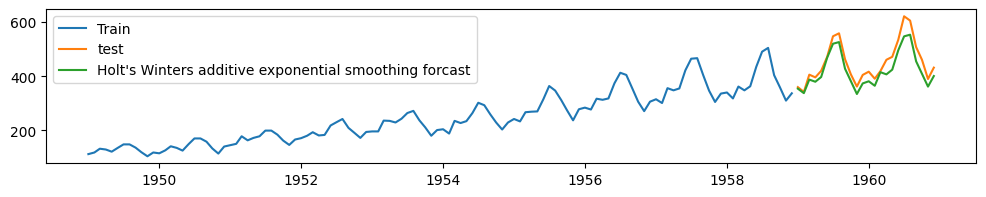

In [ ]:
plt.figure(figsize=(12,2))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Winters additive exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

*Observation*:

It captures the trend, which we can see that the forecasted values are little higher level than the train level.
It also captures teh seasonality.
The peak of the forecasted value is little lesser than the actual.

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hwa_forecast'])).round(2)
rmse

35.76

In [ ]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_hwa['hwa_forecast'])/test['Passengers'])*100),2)
mape

6.64

In [ ]:
results = results.append({'Method':'Holt\'s Winter additive method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58
1,Simple average method,219.44,44.23
2,Simple moving average method,103.21,15.47
3,Simple expenential smoothing method,107.52,16.43
4,Holt's expenential smoothing method,80.90,11.32
5,Holt's Winter additive method,35.76,6.64


*Observaion*:

We can see that the errors have reduced drastically once we are able to capture the level, trend and seasonality altogether.

## Multiplicative method

In [ ]:
y_hat_hwm = test.copy()

In [ ]:
# seasonal=mul for multiplicative method
# trend='add' . We are not changing the trend. We are only chaning the seasonal from additive to multiplicative.
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='add', seasonal='mul')

In [ ]:
model_fit = model.fit(optimized=True)

In [ ]:
model_fit.params

{'smoothing_level': 0.364208357460606,
 'smoothing_trend': 4.191162581733996e-09,
 'smoothing_seasonal': 0.6357916412612594,
 'damping_trend': nan,
 'initial_level': 110.89386078445895,
 'initial_trend': 2.389331198805944,
 'initial_seasons': array([0.98867675, 1.03912176, 1.14217091, 1.08689584, 1.00612809,
        1.10442233, 1.20431631, 1.18998306, 1.08561792, 0.94580897,
        0.84005265, 0.96819086]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
# Forecast for last 24 months
y_hat_hwm['hwm_forecast'] = model_fit.forecast(24)

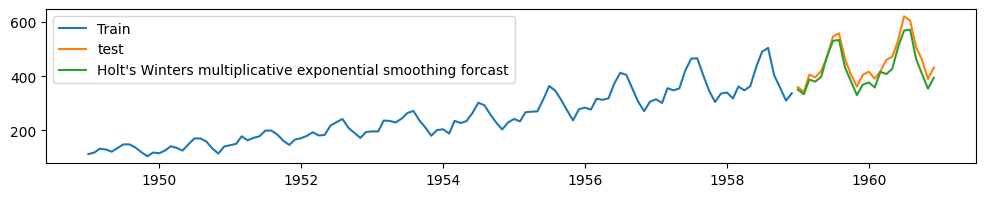

In [ ]:
plt.figure(figsize=(12,2))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt\'s Winters multiplicative exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hwm_forecast'])).round(2)
rmse

32.49

In [ ]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_hwm['hwm_forecast'])/test['Passengers'])*100),2)
mape

6.39

In [ ]:
results = results.append({'Method':'Holt\'s Winter multiplicative method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58
1,Simple average method,219.44,44.23
2,Simple moving average method,103.21,15.47
3,Simple expenential smoothing method,107.52,16.43
4,Holt's expenential smoothing method,80.90,11.32
5,Holt's Winter additive method,35.76,6.64
6,Holt's Winter multiplicative method,32.49,6.39


*Observation*:

We can see that both Additive and multiplicate performed more or less well for forecasting.

---

# Stationary vs Non-stationary Time Series

## 1. Visually checking the Stationarity

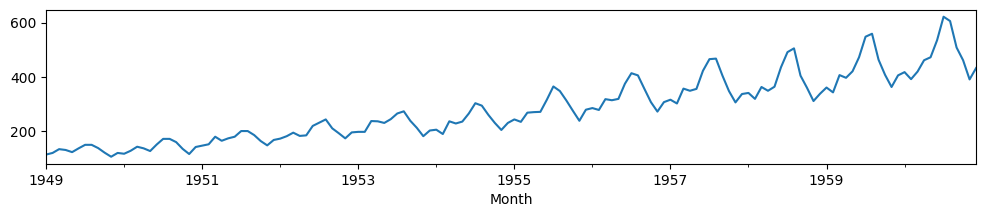

In [ ]:
df1['Passengers'].plot(figsize=(12,2))
plt.show()

*Observation*:

We can see that there is an increasing Trend. So, Trend is not constant.
Variance is also not constant.
Hence the time serise is not stationary.

## 2. Augmented Dickey-Fuller (ADF) Test

Null Hypothesis (H0): The series is not stationary

p-val > 0.05

Alternate Hypothesis (H1): The series is stationary

p-val <= 0.05

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# function for Checking Stationarity of the Data

def test_stationarity(timeseries):

    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original Timeseries')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    airpass_test = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(airpass_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in airpass_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

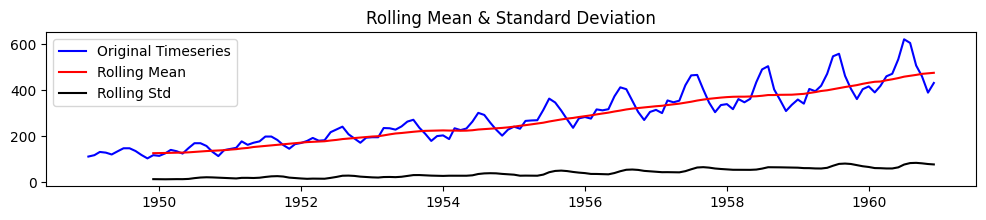

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
#chexking stationarity
plt.figure(figsize=(12, 2))
test_stationarity(df1)

*Observation:*

From above plot, we can see that Rolling Mean itself has a trend component even though Rolling Standard Deviation is fairly constant with time.

For time series to be stationary, we need to ensure that both Rolling Mean and Rolling Standard Deviation remain fairly constant with reference to time.

-As per the Augmented Dickey Fuller Test.

Null Hypothesis is Time Series is Non Stationary.

For a Time series to be stationary, the ADCF test should have:
p-value should be less than 0.05 signicance level.
The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics
From the above ADCF test result, we can see that p-value(near to 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is NOT STATIONARY

## 3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

Null Hypothesis (H0): The series is stationary

p-val>0.05

Alternate Hypothesis (H1): The series is not stationary

p-val <= 0.05

In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(df1['Passengers'])
kpss_test

<ipython-input-74-2d426c4ffe68>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df1['Passengers'])


(1.6513122354165206,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
print('KPSS stats: %f' % kpss_test[0])
print('p-value: %f' %kpss_test[1])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%'])

KPSS stats: 1.651312
p-value: 0.010000
Critical value @ 0.05: 0.46


*Observation*:

p-val(0.01) < Critical value(0.05)
Reject the null hypothesis (The series is stationary)

Hence, as per alternate hypothesis the time series is *non stationary*.

# Converting Non-Stationary to Stationary Time Series

In [ ]:
df1

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Differencing
* A non-stationary time series can be converted to a stationary time series through a technique called differencing. Differencing series is the change between consecutive data points in the series.
* Differencing is performed by subtracting the previous observation from the current observation.
* Differencing removes trend and seasonality in a Time series. When an entire cycle is used for differencing the other cycle, then the seasonality is removed.

In [ ]:
#Convert non stationary data into stationary using 1st difference.

df1['first_difference'] = df1['Passengers']-df1['Passengers'].shift(1)
df1.head()

,Passengers,first_difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("P-value is less than 0.05, Data has no unit root and is stationary")
    else:
        print("P-value is greater than 0.05,, time series has a unit root, indicating it is non-stationary ")

In [ ]:
#lets Run ADF test and check for stationarity

adf_test(df1['first_difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
P-value is greater than 0.05,, time series has a unit root, indicating it is non-stationary 


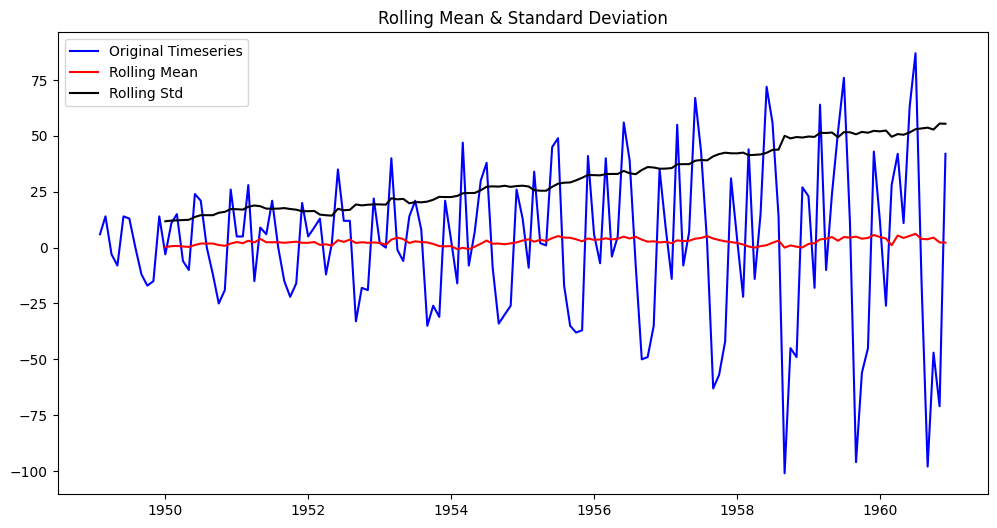

Results of Dickey Fuller Test:
ADF Statistics: -2.8292668241700047
p-value: 0.05421329028382478
P-value is greater than 0.05, time series has a unit root, indicating it is non-stationary 


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Function for Checking Stationarity of the Data
def test_stationarity(timeseries):
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original Timeseries')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("P-value is less than 0.05, Data has no unit root and is stationary")
    else:
        print("P-value is greater than 0.05, time series has a unit root, indicating it is non-stationary ")

# Assuming you have a DataFrame df1 with 'Passengers' as your time series data
# Call the function to test stationarity
test_stationarity(df1['first_difference'].dropna())

In [ ]:
#Convert non stationary data into stationary using 2nd difference.

df1['second_difference'] = df1['Passengers']-df1['Passengers'].shift(2)
df1.head()

,Passengers,first_difference,second_difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,20.0
1949-04-01,129,-3.0,11.0
1949-05-01,121,-8.0,-11.0


In [ ]:
#lets Run ADF test and check for stationarity

adf_test(df1['second_difference'].dropna())

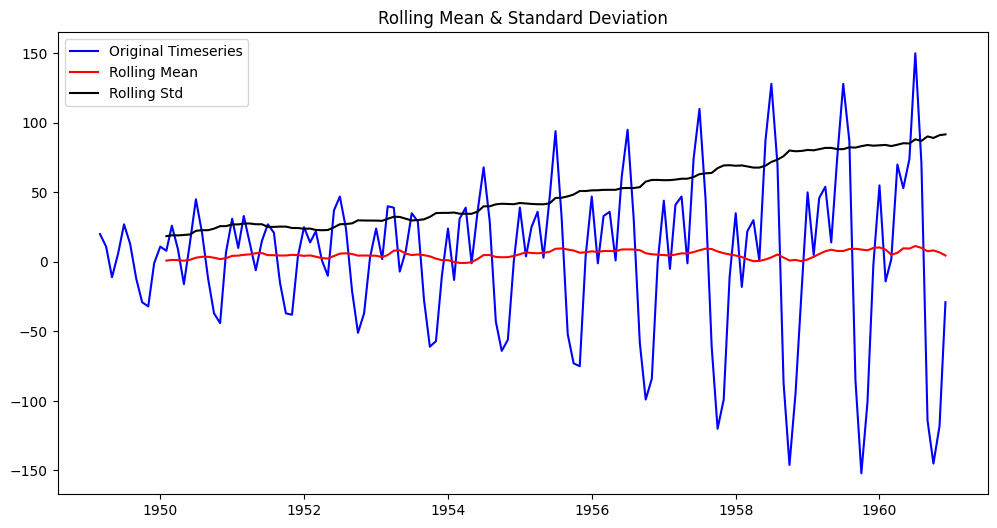

Results of Dickey Fuller Test:
ADF Statistics: -2.961695135555418
p-value: 0.03862975767698902
P-value is less than 0.05, Data has no unit root and is stationary


In [ ]:
test_stationarity(df1['second_difference'].dropna())

## ACF and PACF

The ACF and PACF plots are two graphical tools used in time series analysis to determine the order of an autoregressive (AR) or moving average (MA) model.

* **Autocorrelation Function (ACF)**

The ACF plot shows the correlation between the current value of a time series and its lagged values. The autocorrelations are typically plotted against the lag, which is the number of time periods between the current value and the lagged value.

A significant autocorrelation at lag k indicates that the current value of the time series is correlated with its value k time periods ago. This suggests that the time series has an autoregressive structure.

* **Partial Autocorrelation Function (PACF)**

The PACF plot shows the correlation between the current value of a time series and its lagged values, after removing the effects of the intervening lags. The PACF is typically plotted against the lag, just like the ACF.

A significant spike in the PACF plot at lag k indicates that the current value of the time series is correlated with its value k time periods ago, after removing the effects of the intervening lags. This suggests that the time series has a moving average structure.

In general, the ACF plot is used to identify the order of an AR model, while the PACF plot is used to identify the order of an MA model. However, both plots can be used to identify the order of an ARMA model, which is a combination of an AR and an MA model.


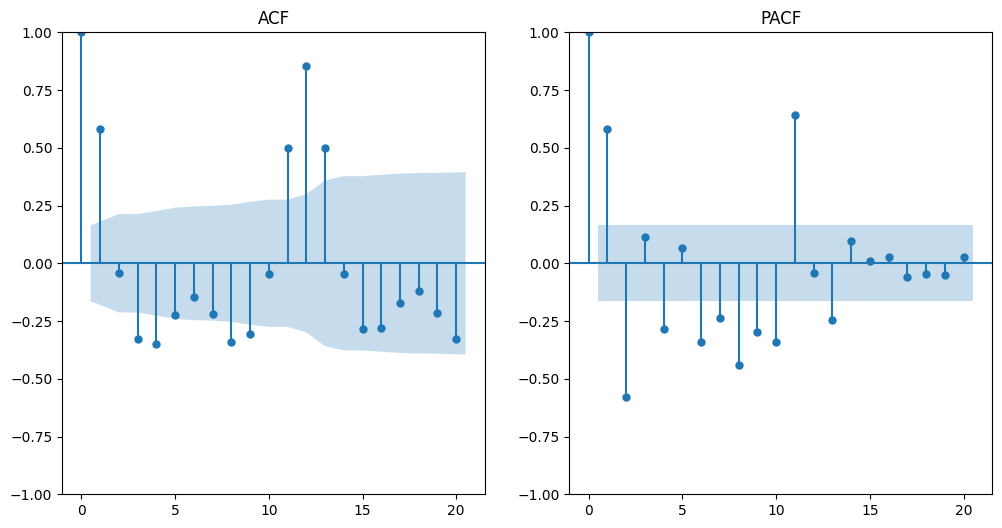

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# ACF and PACF plots
lag_acf = acf(df1['second_difference'].dropna(), nlags=20)
lag_pacf = pacf(df1['second_difference'].dropna(), nlags=20, method='ols')  # 'ols' stands for ordinary least squares

# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df1['second_difference'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF')

# Plot PACF
plt.subplot(122)
plot_pacf(df1['second_difference'].dropna(), lags=20, ax=plt.gca())
plt.title('PACF')
plt.show()

*Observation*:

The ACF plot shows that the autocorrelations decay slowly at first, but then die out after lag 2. This suggests that the second differenced data is not white noise, but has some autoregressive structure.

The PACF plot shows that there are significant spikes at lags 1 and 12. This suggests that the second differenced data has a seasonal component with period 12.

Based on the ACF and PACF plots, we can fit an ARIMA model with the following order:

(1, 0, 1)(1, 1, 1, 12)

This model has one autoregressive term, no moving average term, and one seasonal autoregressive term with period 12.

The ACF and PACF plots can also be used to identify the number of lags to use when fitting the ARIMA model. In this case, the ACF plot suggests that we should use lags up to 20, while the PACF plot suggests that we should use lags up to 12.

However, it is important to note that the ACF and PACF plots are just a starting point for identifying the order of an ARIMA model. The final order should be chosen based on the results of the model fitting procedure.

# Forecast

ARIMA, SARIMA, and SARIMAX are all statistical models used to forecast time series data.

* **ARIMA** stands for Autoregressive Integrated Moving Average. It is a model that uses past values of the time series to predict future values. The ARIMA model has three components:
    * **Autoregressive (AR)** terms: These terms represent the linear relationship between the current value of the time series and its past values.
    * **Moving average (MA)** terms: These terms represent the linear relationship between the current value of the time series and its lagged errors.
    * **Integrated (I)** terms: These terms represent the number of times the time series has been differenced to remove the trend and seasonality.

* **SARIMA** stands for Seasonal Autoregressive Integrated Moving Average. It is an extension of the ARIMA model that allows for seasonality in the time series. The SARIMA model has four components:
    * **Autoregressive (AR)** terms: Same as ARIMA
    * **Moving average (MA)** terms: Same as ARIMA
    * **Integrated (I)** terms: Same as ARIMA
    * **Seasonal autoregressive (SAR)** terms: These terms represent the linear relationship between the current value of the time series and its lagged values, after removing the effects of the intervening lags.
    * **Seasonal moving average (SMA)** terms: These terms represent the linear relationship between the current value of the time series and its lagged errors, after removing the effects of the intervening lags.

* **SARIMAX** stands for Seasonal Autoregressive Integrated Moving Average with exogenous variables. It is an extension of the SARIMA model that allows for exogenous variables. Exogenous variables are variables that are not part of the time series, but that can influence the time series.

The choice of which model to use depends on the characteristics of the time series. If the time series has no seasonality, then the ARIMA model can be used. If the time series has seasonality, then the SARIMA model can be used. If the time series has exogenous variables, then the SARIMAX model can be used.


In [ ]:

# Split the data into train and test sets
train_size = int(len(df1) * 0.8)
train_data = df1['second_difference'].dropna()[:train_size]
test_data = df1['second_difference'].dropna()[train_size:]

# ARIMA Model
order_arima = (1, 0, 1)
model_arima = ARIMA(train_data, order=order_arima)
model_arima_fit = model_arima.fit()
arima_forecast = model_arima_fit.forecast(steps=len(test_data))
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))
arima_mape = mean_absolute_error(test_data, arima_forecast)

print("ARIMA RMSE:", arima_rmse)
print("ARIMA MAPE:", arima_mape)

# SARIMA Model
order_sarima = (1, 0, 1)
seasonal_order_sarima = (1, 1, 1, 12)  # Assuming seasonal period of 12 months
model_sarima = SARIMAX(train_data, order=order_sarima, seasonal_order=seasonal_order_sarima)
model_sarima_fit = model_sarima.fit()
sarima_forecast = model_sarima_fit.forecast(steps=len(test_data))
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast))
sarima_mape = mean_absolute_error(test_data, sarima_forecast)

print("SARIMA RMSE:", sarima_rmse)
print("SARIMA MAPE:", sarima_mape)

# SARIMAX Model (with an exogenous variable, if available)
exogenous_variable = None  # If you have an exogenous variable, replace None with your data
model_sarimax = SARIMAX(train_data, order=order_sarima, seasonal_order=seasonal_order_sarima, exog=exogenous_variable)
model_sarimax_fit = model_sarimax.fit()
sarimax_forecast = model_sarimax_fit.forecast(steps=len(test_data), exog=exogenous_variable)
sarimax_rmse = np.sqrt(mean_squared_error(test_data, sarimax_forecast))
sarimax_mape = mean_absolute_error(test_data, sarimax_forecast)

print("SARIMAX RMSE:", sarimax_rmse)
print("SARIMAX MAPE:", sarimax_mape)


ARIMA RMSE: 80.5039525402076
ARIMA MAPE: 65.98348557917346
SARIMA RMSE: 19.224125318508822
SARIMA MAPE: 15.038173306794855
SARIMAX RMSE: 19.224125318508822
SARIMAX MAPE: 15.038173306794855


In [ ]:
results = results.append({'Method':'ARIMA', 'RMSE':arima_rmse, 'MAPE':arima_mape}, ignore_index=True)
results = results.append({'Method':'SARIMA', 'RMSE':sarima_rmse, 'MAPE':sarima_mape}, ignore_index=True)
results = results.append({'Method':'SARIMAX', 'RMSE':sarimax_rmse, 'MAPE':sarimax_mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,137.330000,23.580000
1,Simple average method,219.440000,44.230000
2,Simple moving average method,103.210000,15.470000
3,Simple expenential smoothing method,107.520000,16.430000
4,Holt's expenential smoothing method,80.900000,11.320000
5,Holt's Winter additive method,35.760000,6.640000
6,Holt's Winter multiplicative method,32.490000,6.390000
7,ARIMA,80.503953,65.983486
8,SARIMA,19.224125,15.038173
9,SARIMAX,19.224125,15.038173


## Interpretation:

These results represent the evaluation metrics (RMSE and MAPE) for various forecasting methods applied to a time series dataset. Let's interpret these metrics:

1. Naive Method:
   - RMSE: 137.33
   - MAPE: 23.58
   - Interpretation: The Naive method provides a baseline for comparison. It has a moderate RMSE and MAPE, indicating moderate accuracy in forecasting.

2. Simple Average Method:
   - RMSE: 219.44
   - MAPE: 44.23
   - Interpretation: The Simple Average method has a higher RMSE and MAPE compared to the Naive method. It suggests that this method is less accurate for forecasting.

3. Simple Moving Average Method:
   - RMSE: 103.21
   - MAPE: 15.47
   - Interpretation: The Simple Moving Average method performs better than the Simple Average method, with a lower RMSE and MAPE, indicating improved accuracy.

4. Simple Exponential Smoothing Method:
   - RMSE: 107.52
   - MAPE: 16.43
   - Interpretation: This method is similar in performance to the Simple Moving Average method, with a relatively low RMSE and MAPE.

5. Holt's Exponential Smoothing Method:
   - RMSE: 80.90
   - MAPE: 11.32
   - Interpretation: Holt's Exponential Smoothing method shows better accuracy compared to the previous methods, with a lower RMSE and MAPE.

6. Holt's Winter Additive Method:
   - RMSE: 35.76
   - MAPE: 6.64
   - Interpretation: This method performs even better, with significantly lower RMSE and MAPE values, indicating higher accuracy.

7. Holt's Winter Multiplicative Method:
   - RMSE: 32.49
   - MAPE: 6.39
   - Interpretation: Similar to the additive method, the multiplicative version also demonstrates high accuracy, with low RMSE and MAPE.

8. ARIMA:
   - RMSE: 80.50
   - MAPE: 65.98
   - Interpretation: ARIMA provides a moderate RMSE but has a high MAPE, suggesting that it may not be the best method for this dataset.

9. SARIMA:
   - RMSE: 19.22
   - MAPE: 15.04
   - Interpretation: SARIMA shows significantly improved accuracy compared to ARIMA, with much lower RMSE and MAPE values.

10. SARIMAX:
    - RMSE: 19.22
    - MAPE: 15.04
    - Interpretation: SARIMAX performs similarly to SARIMA, with low RMSE and MAPE values.

In summary, the Holt's Winter methods (additive and multiplicative) appear to be the most accurate for this dataset, followed by SARIMA and SARIMAX. The Naive method and Simple Exponential Smoothing method perform moderately well, while the Simple Average and Simple Moving Average methods have lower accuracy. ARIMA has a high MAPE, indicating that it may not be suitable for this dataset.

RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error) are commonly used metrics in time series forecasting and regression analysis for several reasons:

1. **Interpretability:** These metrics are easy to interpret and understand, making them accessible to a wide audience, including non-technical stakeholders.

2. **Scale Independence:** RMSE and MAPE are scale-independent, meaning they are not influenced by the units of the target variable. This property allows for the comparison of model performance across different datasets and domains.

3. **Robustness:** Both metrics are robust to outliers and can handle cases where errors can be large. They provide a comprehensive summary of forecast accuracy.

4. **Commonly Used:** RMSE and MAPE are widely used in academic research, industry, and competitions (such as forecasting competitions on platforms like Kaggle), making them a standard choice for evaluating forecasting models.

5. **Ease of Calculation:** These metrics are relatively straightforward to calculate, making them practical for routine model evaluation.

However, it's important to note that while RMSE and MAPE are valuable metrics, they may not be suitable for all scenarios. Depending on the specific characteristics of the dataset and the forecasting problem, other metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or custom loss functions may also be used to evaluate forecasting models.

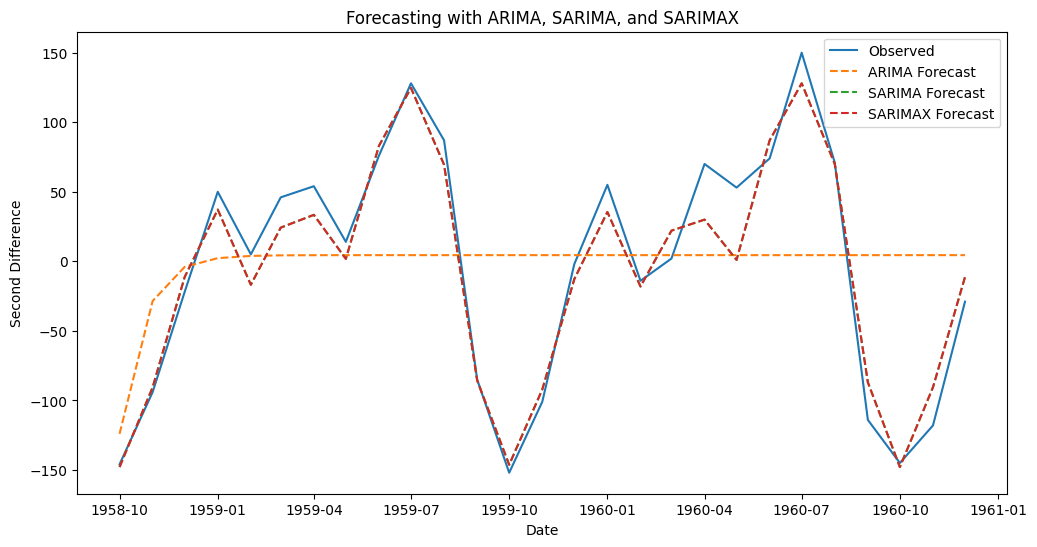

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df1.index[-len(test_data):], test_data, label='Observed')
plt.plot(df1.index[-len(test_data):], arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(df1.index[-len(test_data):], sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.plot(df1.index[-len(test_data):], sarimax_forecast, label='SARIMAX Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Second Difference')
plt.legend()
plt.title('Forecasting with ARIMA, SARIMA, and SARIMAX')
plt.show()

## Predictions:

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# SARIMAX Model
order_sarimax = (1, 0, 1)
seasonal_order_sarimax = (1, 1, 1, 12)  # Assuming seasonal period of 12 months
exog_data = None  # If you have exogenous variables, provide them here as a DataFrame

model_sarimax = SARIMAX(df1['Passengers'], order=order_sarimax, seasonal_order=seasonal_order_sarimax, exog=exog_data)
model_sarimax_fit = model_sarimax.fit(disp=False)

# Forecast for the next 12 months
forecast_steps = 12
sarimax_forecast = model_sarimax_fit.get_forecast(steps=forecast_steps, exog=exog_data)  # Provide exogenous variables if available

# Get the forecasted values and confidence intervals
forecast_values = round(sarimax_forecast.predicted_mean)
confidence_intervals = sarimax_forecast.conf_int()

# Create a date range for the next 12 months
last_date = df1.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, closed='right')


# Print the forecasted values for the next 12 months
print("Forecasted Passengers for Next 12 Months:")
print(forecast_values)


Forecasted Passengers for Next 12 Months:
1961-01-01    447.0
1961-02-01    419.0
1961-03-01    447.0
1961-04-01    490.0
1961-05-01    502.0
1961-06-01    567.0
1961-07-01    657.0
1961-08-01    640.0
1961-09-01    537.0
1961-10-01    487.0
1961-11-01    413.0
1961-12-01    456.0
Freq: MS, Name: predicted_mean, dtype: float64



**Summary:**
In this time series analysis, we aimed to gain insights into the temporal patterns and trends within the AirPassengers dataset. We performed essential data preprocessing tasks required for time series analysis and explored various forecasting methods. Additionally, we evaluated the performance of each method using key metrics such as Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE).

**Conclusion:**
- Through data exploration and analysis, we observed that the number of passengers tends to increase during the summer months and decrease during the winter months. This pattern is consistent with the seasonal nature of travel, with more people flying during vacation periods.
- Among the forecasting methods, Holt's Winter additive and multiplicative methods, as well as seasonal models such as SARIMA and SARIMAX, demonstrated superior performance on the dataset.
- Our evaluation metrics, including RMSE and MAPE, provided valuable insights into the accuracy of each model, helping us identify the most suitable forecasting approaches for this dataset.

This time series analysis has provided a comprehensive understanding of the AirPassengers dataset and equipped us with the tools to make informed predictions about future passenger arrivals. Time series analysis is a crucial tool for forecasting in various domains, and its application to this dataset has showcased its effectiveness in understanding and predicting temporal patterns.

## Thank you for reading till the end.



## -Raviteja